## __ASOS data로 RNN 구현하기__
2022.05.07 @Yeji Choi



In [1]:
import os
import pandas as pd
import numpy as np
import csv
from sklearn.preprocessing import MinMaxScaler

In [5]:
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df_list=list()
for root, dirs, files in os.walk('/content/drive/MyDrive/Colab Notebooks/ASOS/'):    
    print(files)
    for name in files:
        df_list.append(pd.read_csv(os.path.join(root,name),encoding='euc-kr'))

['SURFACE_ASOS_90_MI_2019-08_2019-08_2019.csv', 'SURFACE_ASOS_90_MI_2019-05_2019-05_2019.csv', 'SURFACE_ASOS_90_MI_2019-09_2019-09_2019.csv', 'SURFACE_ASOS_90_MI_2019-01_2019-01_2019.csv', 'SURFACE_ASOS_90_MI_2019-03_2019-03_2019.csv', 'SURFACE_ASOS_90_MI_2019-07_2019-07_2019.csv', 'SURFACE_ASOS_90_MI_2019-12_2019-12_2020.csv', 'SURFACE_ASOS_90_MI_2019-04_2019-04_2019.csv', 'SURFACE_ASOS_90_MI_2019-10_2019-10_2019.csv', 'SURFACE_ASOS_90_MI_2019-11_2019-11_2019.csv', 'SURFACE_ASOS_90_MI_2019-06_2019-06_2019.csv', 'SURFACE_ASOS_90_MI_2019-02_2019-02_2019.csv']


In [7]:
print(len(df_list))
df_list[0]

12


,지점,일시,기온(°C),누적강수량(mm),풍향(deg),풍속(m/s),현지기압(hPa),해면기압(hPa),습도(%),일사(MJ/m^2),일조(Sec)
0,90,2019-08-01 00:01,30.3,0.0,261.4,3.0,1005.6,1007.6,61.0,NaN,0.0
1,90,2019-08-01 00:02,30.3,0.0,255.5,4.2,1005.7,1007.7,60.8,NaN,0.0
2,90,2019-08-01 00:03,30.4,0.0,251.5,4.4,1005.7,1007.7,60.1,NaN,0.0
3,90,2019-08-01 00:04,30.4,0.0,252.3,4.2,1005.7,1007.7,60.0,NaN,0.0
4,90,2019-08-01 00:05,30.4,0.0,269.9,2.7,1005.7,1007.7,60.2,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...
44634,90,2019-08-31 23:56,19.5,0.0,220.6,1.6,1012.6,1014.6,83.5,NaN,41460.0
44635,90,2019-08-31 23:57,19.6,0.0,217.4,1.9,1012.6,1014.6,83.7,NaN,41460.0
44636,90,2019-08-31 23:58,19.7,0.0,217.6,1.9,1012.6,1014.6,83.5,NaN,41460.0
44637,90,2019-08-31 23:59,19.9,0.0,220.5,1.7,1012.6,1014.6,82.9,NaN,41460.0


In [8]:
asos=pd.DataFrame(pd.concat(df_list, sort=False))

In [9]:
asos.head()

,지점,일시,기온(°C),누적강수량(mm),풍향(deg),풍속(m/s),현지기압(hPa),해면기압(hPa),습도(%),일사(MJ/m^2),일조(Sec)
0,90,2019-08-01 00:01,30.3,0.0,261.4,3.0,1005.6,1007.6,61.0,NaN,0.0
1,90,2019-08-01 00:02,30.3,0.0,255.5,4.2,1005.7,1007.7,60.8,NaN,0.0
2,90,2019-08-01 00:03,30.4,0.0,251.5,4.4,1005.7,1007.7,60.1,NaN,0.0
3,90,2019-08-01 00:04,30.4,0.0,252.3,4.2,1005.7,1007.7,60.0,NaN,0.0
4,90,2019-08-01 00:05,30.4,0.0,269.9,2.7,1005.7,1007.7,60.2,NaN,0.0


In [10]:
asos.columns

Index(['지점', '일시', '기온(°C)', '누적강수량(mm)', '풍향(deg)', '풍속(m/s)', '현지기압(hPa)',
       '해면기압(hPa)', '습도(%)', '일사(MJ/m^2)', '일조(Sec)'],
      dtype='object')

In [11]:
asos_new=asos.loc[:,['일시', '기온(°C)', '누적강수량(mm)', '풍향(deg)', '풍속(m/s)', '현지기압(hPa)',
       '해면기압(hPa)', '습도(%)']]
asos_new.head()

,일시,기온(°C),누적강수량(mm),풍향(deg),풍속(m/s),현지기압(hPa),해면기압(hPa),습도(%)
0,2019-08-01 00:01,30.3,0.0,261.4,3.0,1005.6,1007.6,61.0
1,2019-08-01 00:02,30.3,0.0,255.5,4.2,1005.7,1007.7,60.8
2,2019-08-01 00:03,30.4,0.0,251.5,4.4,1005.7,1007.7,60.1
3,2019-08-01 00:04,30.4,0.0,252.3,4.2,1005.7,1007.7,60.0
4,2019-08-01 00:05,30.4,0.0,269.9,2.7,1005.7,1007.7,60.2


In [12]:
asos_new.describe()

,기온(°C),누적강수량(mm),풍향(deg),풍속(m/s),현지기압(hPa),해면기압(hPa),습도(%)
count,525387.000000,524045.000000,525387.000000,525387.000000,525383.000000,525383.000000,525387.000000
mean,13.829358,1.947681,214.921407,1.862283,1012.976691,1015.102460,60.437502
std,9.089668,10.328102,100.165839,1.327279,7.857519,7.933784,24.010775
min,-9.000000,0.000000,0.000000,0.000000,988.700000,990.700000,4.200000
25%,5.800000,0.000000,137.600000,0.900000,1007.200000,1009.200000,40.900000
50%,14.500000,0.000000,256.900000,1.600000,1013.200000,1015.400000,61.800000
75%,21.400000,0.000000,289.100000,2.500000,1018.600000,1020.800000,81.600000
max,36.100000,203.700000,359.900000,11.900000,1033.000000,1035.300000,98.500000


In [ ]:
asos_new.shape

(525589, 8)

In [13]:
asos_new.isnull().sum()

일시              0
기온(°C)        202
누적강수량(mm)    1544
풍향(deg)       202
풍속(m/s)       202
현지기압(hPa)     206
해면기압(hPa)     206
습도(%)         202
dtype: int64

In [14]:
asos_new=asos_new.fillna(0)

In [15]:
asos_new.isnull().sum()

일시           0
기온(°C)       0
누적강수량(mm)    0
풍향(deg)      0
풍속(m/s)      0
현지기압(hPa)    0
해면기압(hPa)    0
습도(%)        0
dtype: int64

In [16]:
asos_new.dtypes

일시            object
기온(°C)       float64
누적강수량(mm)    float64
풍향(deg)      float64
풍속(m/s)      float64
현지기압(hPa)    float64
해면기압(hPa)    float64
습도(%)        float64
dtype: object

In [17]:
data_all=[]
label_all=[]

data=asos_new
data['Time'] = pd.to_datetime(data['일시'])
data = data.set_index('Time')
data = data.resample('h').first()
#data = data.fillna(method='ffill')
no,_=data.shape
print(data.shape)
data_all=data

print(np.array(data_all).shape)

(8761, 8)
(8761, 8)


In [18]:
data_all

,일시,기온(°C),누적강수량(mm),풍향(deg),풍속(m/s),현지기압(hPa),해면기압(hPa),습도(%)
Time,,,,,,,,
2019-01-01 00:00:00,2019-01-01 00:01,-2.4,0.0,270.0,0.8,1028.9,1031.2,19.4
2019-01-01 01:00:00,2019-01-01 01:00,-1.9,0.0,6.3,0.3,1028.8,1031.1,17.6
2019-01-01 02:00:00,2019-01-01 02:00,-2.2,0.0,352.8,1.7,1028.6,1030.9,16.6
2019-01-01 03:00:00,2019-01-01 03:00,-2.5,0.0,353.8,1.4,1028.7,1031.0,18.4
2019-01-01 04:00:00,2019-01-01 04:00,-3.9,0.0,307.1,1.4,1027.9,1030.3,20.3
...,...,...,...,...,...,...,...,...
2019-12-31 20:00:00,2019-12-31 20:00,-3.0,0.0,286.3,3.5,1025.6,1027.9,17.0
2019-12-31 21:00:00,2019-12-31 21:00,-2.6,0.0,280.7,4.4,1025.5,1027.8,14.0
2019-12-31 22:00:00,2019-12-31 22:00,-3.1,0.0,209.5,0.4,1025.8,1028.1,15.5


In [19]:
asos_in=data_all.drop('일시',axis=1)
asos_in

,기온(°C),누적강수량(mm),풍향(deg),풍속(m/s),현지기압(hPa),해면기압(hPa),습도(%)
Time,,,,,,,
2019-01-01 00:00:00,-2.4,0.0,270.0,0.8,1028.9,1031.2,19.4
2019-01-01 01:00:00,-1.9,0.0,6.3,0.3,1028.8,1031.1,17.6
2019-01-01 02:00:00,-2.2,0.0,352.8,1.7,1028.6,1030.9,16.6
2019-01-01 03:00:00,-2.5,0.0,353.8,1.4,1028.7,1031.0,18.4
2019-01-01 04:00:00,-3.9,0.0,307.1,1.4,1027.9,1030.3,20.3
...,...,...,...,...,...,...,...
2019-12-31 20:00:00,-3.0,0.0,286.3,3.5,1025.6,1027.9,17.0
2019-12-31 21:00:00,-2.6,0.0,280.7,4.4,1025.5,1027.8,14.0
2019-12-31 22:00:00,-3.1,0.0,209.5,0.4,1025.8,1028.1,15.5


In [20]:
scaler = MinMaxScaler()
scaled=scaler.fit(asos_in)
asos_scaled=scaler.transform(asos_in)
asos_scaled.shape

(8761, 7)

In [21]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.DataFrame(asos_scaled).describe()

,0,1,2,3,4,5,6
count,8761.00000,8761.00000,8761.00000,8761.00000,8761.00000,8761.00000,8761.00000
mean,0.50060,0.00990,0.59611,0.17517,0.54933,0.54845,0.59445
std,0.20659,0.05172,0.27779,0.12484,0.17779,0.17831,0.25632
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,0.31818,0.00000,0.38288,0.08491,0.41855,0.41573,0.38568
50%,0.51591,0.00000,0.70770,0.15094,0.55430,0.55506,0.60897
75%,0.67273,0.00000,0.80161,0.23585,0.67647,0.67640,0.82051
max,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000


* **Lambda 함수**
 + 한줄로 표현되는 익명함수
 + 코드 상에서 한번만 사용될때 사용.

In [22]:
def add(x,y):
    return x+y
print(add(10,20))

add2= lambda x,y:x+y
add2(10,20)

30


30

In [23]:
def sliding_windows(data, seq_length):
    x = []
    y = []

    for i in range(len(data)-seq_length-1):
        _x = data[i:(i+seq_length)]
        _y = data[i+seq_length]
        x.append(_x)
        y.append(_y)

    return np.array(x),np.array(y)

In [61]:
from torch.autograd import Variable 
#텐서 연산에서 자동미분이 가능하다는 의미인데 
#모든 tensor가 자동적으로 variable의 성질을 갖기 때문에 
#1.7버젼에서는 더이상 사용되지 않음
import torch
import torch.nn as nn
from torch import optim
from tqdm import trange
import random
print(torch.__version__)

1.11.0+cu113


In [25]:
training_set=np.array(asos_in)[:,0:1]
training_set.shape

(8761, 1)

In [26]:
training_set[:10,:]

array([[-2.4],
       [-1.9],
       [-2.2],
       [-2.5],
       [-3.9],
       [-4.9],
       [-3.3],
       [-5.1],
       [-3.6],
       [-2.2]])

In [27]:
seq_length = 10
x, y = sliding_windows(training_set, seq_length)
print(x.shape, y.shape)

(8750, 10, 1) (8750, 1)


In [28]:
for i in range(10):
    print(x[i,:,0], y[i,0])

[-2.4 -1.9 -2.2 -2.5 -3.9 -4.9 -3.3 -5.1 -3.6 -2.2] -0.5
[-1.9 -2.2 -2.5 -3.9 -4.9 -3.3 -5.1 -3.6 -2.2 -0.5] 1.6
[-2.2 -2.5 -3.9 -4.9 -3.3 -5.1 -3.6 -2.2 -0.5  1.6] 1.4
[-2.5 -3.9 -4.9 -3.3 -5.1 -3.6 -2.2 -0.5  1.6  1.4] 1.7
[-3.9 -4.9 -3.3 -5.1 -3.6 -2.2 -0.5  1.6  1.4  1.7] 1.4
[-4.9 -3.3 -5.1 -3.6 -2.2 -0.5  1.6  1.4  1.7  1.4] 0.8
[-3.3 -5.1 -3.6 -2.2 -0.5  1.6  1.4  1.7  1.4  0.8] 0.8
[-5.1 -3.6 -2.2 -0.5  1.6  1.4  1.7  1.4  0.8  0.8] -0.1
[-3.6 -2.2 -0.5  1.6  1.4  1.7  1.4  0.8  0.8 -0.1] -0.9
[-2.2 -0.5  1.6  1.4  1.7  1.4  0.8  0.8 -0.1 -0.9] -1.6


In [29]:
training_set=np.array(asos_scaled)[:,0:1]
training_set.shape

(8761, 1)

In [30]:
sc = MinMaxScaler()
training_data = sc.fit_transform(training_set)

print(training_data.shape)

seq_length = 10
x, y = sliding_windows(training_data, seq_length)
print(x.shape, y.shape)

(8761, 1)
(8750, 10, 1) (8750, 1)


In [31]:
for i in range(10):
    print(x[i,:,0], y[i,0])

[0.13181818 0.14318182 0.13636364 0.12954545 0.09772727 0.075
 0.11136364 0.07045455 0.10454545 0.13636364] 0.175
[0.14318182 0.13636364 0.12954545 0.09772727 0.075      0.11136364
 0.07045455 0.10454545 0.13636364 0.175     ] 0.22272727272727272
[0.13636364 0.12954545 0.09772727 0.075      0.11136364 0.07045455
 0.10454545 0.13636364 0.175      0.22272727] 0.21818181818181814
[0.12954545 0.09772727 0.075      0.11136364 0.07045455 0.10454545
 0.13636364 0.175      0.22272727 0.21818182] 0.22499999999999998
[0.09772727 0.075      0.11136364 0.07045455 0.10454545 0.13636364
 0.175      0.22272727 0.21818182 0.225     ] 0.21818181818181814
[0.075      0.11136364 0.07045455 0.10454545 0.13636364 0.175
 0.22272727 0.21818182 0.225      0.21818182] 0.20454545454545453
[0.11136364 0.07045455 0.10454545 0.13636364 0.175      0.22272727
 0.21818182 0.225      0.21818182 0.20454545] 0.20454545454545453
[0.07045455 0.10454545 0.13636364 0.175      0.22272727 0.21818182
 0.225      0.21818182 0.2

In [32]:
train_size = int(len(y) * 0.7)
test_size = len(y) - train_size

dataX = Variable(torch.Tensor(np.array(x)))
dataY = Variable(torch.Tensor(np.array(y)))

trainX = Variable(torch.Tensor(np.array(x[0:train_size])))
trainY = Variable(torch.Tensor(np.array(y[0:train_size])))

testX = Variable(torch.Tensor(np.array(x[train_size:len(x)])))
testY = Variable(torch.Tensor(np.array(y[train_size:len(y)])))

trainX.shape, trainY.shape, testX.shape, testY.shape

(torch.Size([6125, 10, 1]),
 torch.Size([6125, 1]),
 torch.Size([2625, 10, 1]),
 torch.Size([2625, 1]))

In [33]:
class LSTM(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()
        
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length
        
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)
        
        self.fc3 = nn.Linear(self.hidden_size, 10)
        self.fc2 = nn.Linear(10, num_classes)
        self.relu = nn.ReLU()

    def forward(self, x):
        h_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        c_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        outputs, (ht, ct) = self.lstm(x, (h_0, c_0))
        h_out = ht.view(-1, self.hidden_size)
        
        out = self.fc3(h_out)
        out = self.relu(out)
        out = self.fc2(out)
        return out


In [34]:
num_epochs = 1000
learning_rate = 0.001

input_size = 1 #input feature 갯수
hidden_size = 16 #hidden node 갯수
num_layers = 1 # layer 갯수

num_classes = 1 #output node 갯수

lstm = LSTM(num_classes, input_size, hidden_size, num_layers)

criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)
#optimizer = torch.optim.SGD(lstm.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    outputs = lstm(trainX)
    
    # obtain the loss function
    loss = criterion(outputs, trainY)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 0, loss: 0.44154
Epoch: 100, loss: 0.02619
Epoch: 200, loss: 0.00418
Epoch: 300, loss: 0.00378
Epoch: 400, loss: 0.00343
Epoch: 500, loss: 0.00304
Epoch: 600, loss: 0.00255
Epoch: 700, loss: 0.00214
Epoch: 800, loss: 0.00195
Epoch: 900, loss: 0.00178


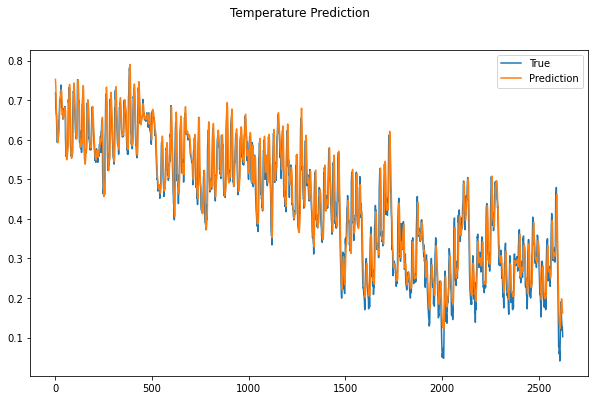

In [35]:
import matplotlib.pyplot as plt

lstm.eval()
test_predict = lstm(testX[:,:,0:1])

data_predict = test_predict.data.numpy()
dataY_plot = testY[:].data.numpy()


data_predict = sc.inverse_transform(data_predict)
dataY_plot = sc.inverse_transform(dataY_plot)

plt.figure(figsize=(10,6))


plt.plot(dataY_plot,label='True')
plt.plot(data_predict,label='Prediction')
plt.suptitle('Temperature Prediction')
plt.legend()
plt.show()

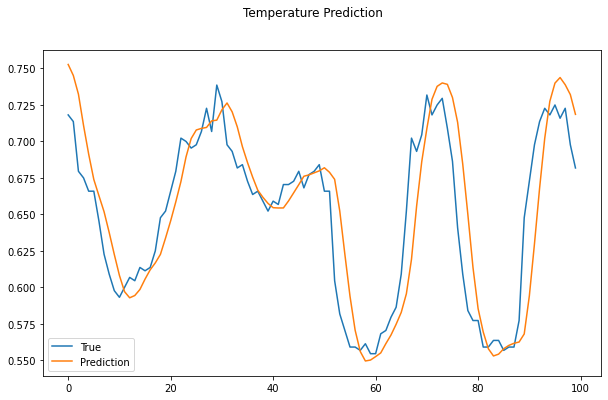

In [36]:
lstm.eval()
test_predict = lstm(testX[:100,:,0:1])

data_predict = test_predict.data.numpy()
dataY_plot = testY[:100].data.numpy()


data_predict = sc.inverse_transform(data_predict)
dataY_plot = sc.inverse_transform(dataY_plot)

plt.figure(figsize=(10,6))


plt.plot(dataY_plot,label='True')
plt.plot(data_predict,label='Prediction')
plt.suptitle('Temperature Prediction')
plt.legend()
plt.show()

## GRU seq-to-seq

In [136]:
def sliding_windows_for_seqtoseq(data, seq_length):
    x = []
    y = []

    for i in range(len(data)-2*seq_length-1):
        _x = data[i:(i+seq_length)]
        _y = data[i+seq_length:i+seq_length+5]
        x.append(_x)
        y.append(_y)

    return np.array(x),np.array(y)

In [137]:
seq_length = 10
x, y = sliding_windows_for_seqtoseq(training_set, seq_length)
print(x.shape, y.shape)

(8740, 10, 1) (8740, 5, 1)


In [138]:
x[:4,:,0], y[:4,:,0]

(array([[0.13181818, 0.14318182, 0.13636364, 0.12954545, 0.09772727,
         0.075     , 0.11136364, 0.07045455, 0.10454545, 0.13636364],
        [0.14318182, 0.13636364, 0.12954545, 0.09772727, 0.075     ,
         0.11136364, 0.07045455, 0.10454545, 0.13636364, 0.175     ],
        [0.13636364, 0.12954545, 0.09772727, 0.075     , 0.11136364,
         0.07045455, 0.10454545, 0.13636364, 0.175     , 0.22272727],
        [0.12954545, 0.09772727, 0.075     , 0.11136364, 0.07045455,
         0.10454545, 0.13636364, 0.175     , 0.22272727, 0.21818182]]),
 array([[0.175     , 0.22272727, 0.21818182, 0.225     , 0.21818182],
        [0.22272727, 0.21818182, 0.225     , 0.21818182, 0.20454545],
        [0.21818182, 0.225     , 0.21818182, 0.20454545, 0.20454545],
        [0.225     , 0.21818182, 0.20454545, 0.20454545, 0.18409091]]))

## reference 
https://github.com/lkulowski/LSTM_encoder_decoder/tree/79a6ecef04f1fa6b152ffdd16c903fb5a284478b

In [139]:
# Author: Laura Kulowski


class lstm_encoder(nn.Module):
    ''' Encodes time-series sequence '''

    def __init__(self, input_size, hidden_size, num_layers = 1):
        
        '''
        : param input_size:     the number of features in the input X
        : param hidden_size:    the number of features in the hidden state h
        : param num_layers:     number of recurrent layers (i.e., 2 means there are
        :                       2 stacked LSTMs)
        '''
        
        super(lstm_encoder, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # define LSTM layer
        self.lstm = nn.LSTM(input_size = input_size, hidden_size = hidden_size,
                            num_layers = num_layers)

    def forward(self, x_input):
        
        '''
        : param x_input:               input of shape (seq_len, # in batch, input_size)
        : return lstm_out, hidden:     lstm_out gives all the hidden states in the sequence;
        :                              hidden gives the hidden state and cell state for the last
        :                              element in the sequence 
        '''
        
        lstm_out, self.hidden = self.lstm(x_input.view(x_input.shape[0], x_input.shape[1], self.input_size))
        
        return lstm_out, self.hidden     
    
    def init_hidden(self, batch_size):
        
        '''
        initialize hidden state
        : param batch_size:    x_input.shape[1]
        : return:              zeroed hidden state and cell state 
        '''
        
        return (torch.zeros(self.num_layers, batch_size, self.hidden_size),
                torch.zeros(self.num_layers, batch_size, self.hidden_size))


class lstm_decoder(nn.Module):
    ''' Decodes hidden state output by encoder '''
    
    def __init__(self, input_size, hidden_size, num_layers = 1):

        '''
        : param input_size:     the number of features in the input X
        : param hidden_size:    the number of features in the hidden state h
        : param num_layers:     number of recurrent layers (i.e., 2 means there are
        :                       2 stacked LSTMs)
        '''
        
        super(lstm_decoder, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size = input_size, hidden_size = hidden_size,
                            num_layers = num_layers)
        self.linear = nn.Linear(hidden_size, input_size)           

    def forward(self, x_input, encoder_hidden_states):
        
        '''        
        : param x_input:                    should be 2D (batch_size, input_size)
        : param encoder_hidden_states:      hidden states
        : return output, hidden:            output gives all the hidden states in the sequence;
        :                                   hidden gives the hidden state and cell state for the last
        :                                   element in the sequence 
 
        '''
        
        lstm_out, self.hidden = self.lstm(x_input.unsqueeze(0), encoder_hidden_states)
        output = self.linear(lstm_out.squeeze(0))     
        
        return output, self.hidden

class lstm_seq2seq(nn.Module):
    ''' train LSTM encoder-decoder and make predictions '''
    
    def __init__(self, input_size, hidden_size):

        '''
        : param input_size:     the number of expected features in the input X
        : param hidden_size:    the number of features in the hidden state h
        '''

        super(lstm_seq2seq, self).__init__()

        self.input_size = input_size
        self.hidden_size = hidden_size

        self.encoder = lstm_encoder(input_size = input_size, hidden_size = hidden_size)
        self.decoder = lstm_decoder(input_size = input_size, hidden_size = hidden_size)


    def train_model(self, input_tensor, target_tensor, n_epochs, target_len, batch_size, training_prediction = 'recursive', teacher_forcing_ratio = 0.5, learning_rate = 0.01, dynamic_tf = False):
        
        '''
        train lstm encoder-decoder
        
        : param input_tensor:              input data with shape (seq_len, # in batch, number features); PyTorch tensor    
        : param target_tensor:             target data with shape (seq_len, # in batch, number features); PyTorch tensor
        : param n_epochs:                  number of epochs 
        : param target_len:                number of values to predict 
        : param batch_size:                number of samples per gradient update
        : param training_prediction:       type of prediction to make during training ('recursive', 'teacher_forcing', or
        :                                  'mixed_teacher_forcing'); default is 'recursive'
        : param teacher_forcing_ratio:     float [0, 1) indicating how much teacher forcing to use when
        :                                  training_prediction = 'teacher_forcing.' For each batch in training, we generate a random
        :                                  number. If the random number is less than teacher_forcing_ratio, we use teacher forcing.
        :                                  Otherwise, we predict recursively. If teacher_forcing_ratio = 1, we train only using
        :                                  teacher forcing.
        : param learning_rate:             float >= 0; learning rate
        : param dynamic_tf:                use dynamic teacher forcing (True/False); dynamic teacher forcing
        :                                  reduces the amount of teacher forcing for each epoch
        : return losses:                   array of loss function for each epoch
        '''
        
        # initialize array of losses 
        losses = np.full(n_epochs, np.nan)

        optimizer = optim.Adam(self.parameters(), lr = learning_rate)
        criterion = nn.MSELoss()

        # calculate number of batch iterations
        n_batches = int(input_tensor.shape[1] / batch_size)

        with trange(n_epochs) as tr:
            for it in tr:
                
                batch_loss = 0.
                batch_loss_tf = 0.
                batch_loss_no_tf = 0.
                num_tf = 0
                num_no_tf = 0

                for b in range(n_batches):
                    # select data 
                    input_batch = input_tensor[:, b: b + batch_size, :]
                    target_batch = target_tensor[:, b: b + batch_size, :]

                    # outputs tensor
                    outputs = torch.zeros(target_len, batch_size, input_batch.shape[2])

                    # initialize hidden state
                    encoder_hidden = self.encoder.init_hidden(batch_size)

                    # zero the gradient
                    optimizer.zero_grad()

                    # encoder outputs
                    encoder_output, encoder_hidden = self.encoder(input_batch)

                    # decoder with teacher forcing
                    decoder_input = input_batch[-1, :, :]   # shape: (batch_size, input_size)
                    decoder_hidden = encoder_hidden

                    if training_prediction == 'recursive':
                        # predict recursively
                        for t in range(target_len): 
                            decoder_output, decoder_hidden = self.decoder(decoder_input, decoder_hidden)
                            outputs[t] = decoder_output
                            decoder_input = decoder_output

                    if training_prediction == 'teacher_forcing':
                        # use teacher forcing
                        if random.random() < teacher_forcing_ratio:
                            for t in range(target_len): 
                                decoder_output, decoder_hidden = self.decoder(decoder_input, decoder_hidden)
                                outputs[t] = decoder_output
                                decoder_input = target_batch[t, :, :]

                        # predict recursively 
                        else:
                            for t in range(target_len): 
                                decoder_output, decoder_hidden = self.decoder(decoder_input, decoder_hidden)
                                outputs[t] = decoder_output
                                decoder_input = decoder_output

                    if training_prediction == 'mixed_teacher_forcing':
                        # predict using mixed teacher forcing
                        for t in range(target_len):
                            decoder_output, decoder_hidden = self.decoder(decoder_input, decoder_hidden)
                            outputs[t] = decoder_output
                            
                            # predict with teacher forcing
                            if random.random() < teacher_forcing_ratio:
                                decoder_input = target_batch[t, :, :]
                            
                            # predict recursively 
                            else:
                                decoder_input = decoder_output

                    # compute the loss 
                    loss = criterion(outputs, target_batch)
                    batch_loss += loss.item()
                    
                    # backpropagation
                    loss.backward()
                    optimizer.step()

                # loss for epoch 
                batch_loss /= n_batches 
                losses[it] = batch_loss

                # dynamic teacher forcing
                if dynamic_tf and teacher_forcing_ratio > 0:
                    teacher_forcing_ratio = teacher_forcing_ratio - 0.02 

                # progress bar 
                tr.set_postfix(loss="{0:.3f}".format(batch_loss))
                    
        return losses

    def predict(self, input_tensor, target_len):
        
        '''
        : param input_tensor:      input data (seq_len, input_size); PyTorch tensor 
        : param target_len:        number of target values to predict 
        : return np_outputs:       np.array containing predicted values; prediction done recursively 
        '''

        # encode input_tensor
        input_tensor = input_tensor.unsqueeze(1)     # add in batch size of 1
        encoder_output, encoder_hidden = self.encoder(input_tensor)

        # initialize tensor for predictions
        outputs = torch.zeros(target_len, input_tensor.shape[2])

        # decode input_tensor
        decoder_input = input_tensor[-1, :, :]
        decoder_hidden = encoder_hidden
        
        for t in range(target_len):
            decoder_output, decoder_hidden = self.decoder(decoder_input, decoder_hidden)
            outputs[t] = decoder_output.squeeze(0)
            decoder_input = decoder_output
            
        np_outputs = outputs.detach().numpy()
        
        return np_outputs

In [140]:
train_size = int(len(y) * 0.7)
test_size = len(y) - train_size

dataX = Variable(torch.Tensor(np.array(x)))
dataY = Variable(torch.Tensor(np.array(y)))

trainX = Variable(torch.Tensor(np.array(x[0:train_size])))
trainY = Variable(torch.Tensor(np.array(y[0:train_size])))

testX = Variable(torch.Tensor(np.array(x[train_size:len(x)])))
testY = Variable(torch.Tensor(np.array(y[train_size:len(y)])))

trainX = np.transpose(trainX, (1,0,2))
trainY = np.transpose(trainY, (1,0,2))
testX = np.transpose(testX, (1,0,2))
testY = np.transpose(testY, (1,0,2))

trainX.shape, trainY.shape, testX.shape, testY.shape

(torch.Size([10, 6118, 1]),
 torch.Size([5, 6118, 1]),
 torch.Size([10, 2622, 1]),
 torch.Size([5, 2622, 1]))

In [183]:
model = lstm_seq2seq(input_size = trainX.shape[2], hidden_size = 32)
loss = model.train_model(trainX, trainY, n_epochs = 200, target_len = 5, batch_size = 1024, training_prediction = 'teacher_forcing', teacher_forcing_ratio = 0.9, learning_rate = 0.003, dynamic_tf = False)

100%|██████████| 200/200 [00:39<00:00,  5.06it/s, loss=0.000]


In [184]:
def plot_train_test_results(lstm_model, Xtrain, Ytrain, Xtest, Ytest, num_rows = 4):
  '''
  plot examples of the lstm encoder-decoder evaluated on the training/test data
  '''

  # input window size
  iw = trainX.shape[0]
  ow = trainY.shape[0]

  print(iw, ow)
  # figure setup 
  num_cols = 2
  num_plots = num_rows * num_cols

  fig, ax = plt.subplots(num_rows, num_cols, figsize = (13, 15))
  
  # plot training/test predictions
  for idx in range(num_rows):
      ii = idx+1600
      # train set
      X_train_plt = trainX[:, ii, :]
      Y_train_pred = lstm_model.predict(X_train_plt, target_len = ow)

      ax[idx, 0].plot(np.arange(0, iw), trainX[:, ii, 0], 'k', linewidth = 2, label = 'Input')
      ax[idx, 0].plot(np.arange(iw - 1, iw + ow), np.concatenate([[trainX[-1, ii, 0]], trainY[:, ii, 0]]),
                     color = (0.2, 0.42, 0.72), linewidth = 2, label = 'Target')
      ax[idx, 0].plot(np.arange(iw - 1, iw + ow),  np.concatenate([[trainX[-1, ii, 0]], Y_train_pred[:, 0]]),
                     color = (0.76, 0.01, 0.01), linewidth = 2, label = 'Prediction')
      ax[idx, 0].set_xlim([0, iw + ow - 1])
      ax[idx, 0].set_xlabel('$t$')
      ax[idx, 0].set_ylabel('$y$')

      # test set
      ii = idx + 10
      X_test_plt = testX[:, ii, :]
      Y_test_pred = lstm_model.predict(X_test_plt, target_len = ow)
      ax[idx, 1].plot(np.arange(0, iw), testX[:, ii, 0], 'k', linewidth = 2, label = 'Input')
      ax[idx, 1].plot(np.arange(iw - 1, iw + ow), np.concatenate([[testX[-1, ii, 0]], testY[:, ii, 0]]),
                     color = (0.2, 0.42, 0.72), linewidth = 2, label = 'Target')
      ax[idx, 1].plot(np.arange(iw - 1, iw + ow), np.concatenate([[testX[-1, ii, 0]], Y_test_pred[:, 0]]),
                     color = (0.76, 0.01, 0.01), linewidth = 2, label = 'Prediction')
      ax[idx, 1].set_xlim([0, iw + ow - 1])
      ax[idx, 1].set_xlabel('$t$')
      ax[idx, 1].set_ylabel('$y$')

      if idx == 0:
        ax[idx, 0].set_title('Train')
        
        ax[idx, 1].legend(bbox_to_anchor=(1, 1))
        ax[idx, 1].set_title('Test')

  plt.suptitle('LSTM Encoder-Decoder Predictions', x = 0.445, y = 1.)
  plt.tight_layout()
  plt.subplots_adjust(top = 0.95)
  plt.savefig('plots/predictions.png')
  plt.show()
  plt.close() 
      
  return 

10 5


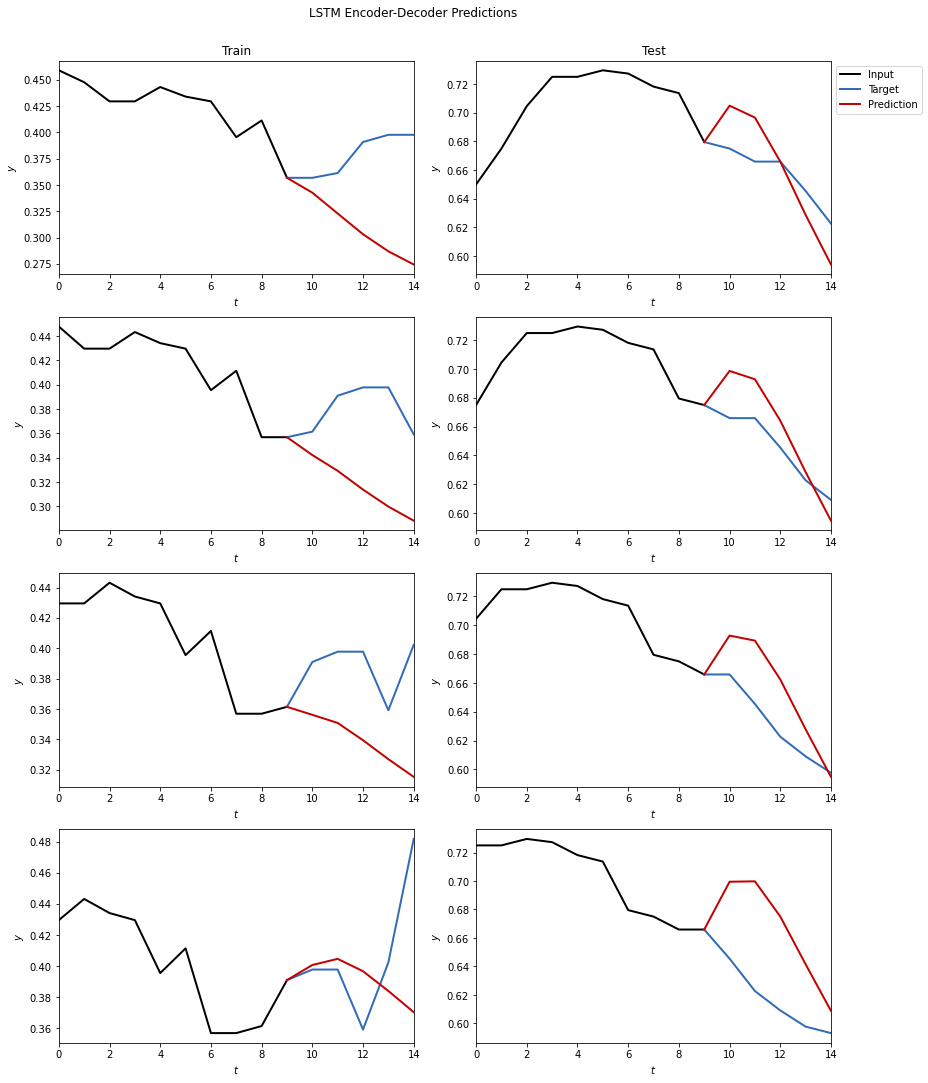

In [185]:
plot_train_test_results(model, trainX, trainY, testX, testY, num_rows = 4)